In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f = 857e12     # Frequency of wave
opnmax = 10    # Maximum optical density
eps0 = 8.854187812813e-12   # Permittivity of free space
mu0 = 1.2566370621219e-6    # Permeability of free space
c0 = round(1/np.sqrt(mu0*eps0))   # Speed of light in free space
imax = 400     # Number of cells in x-direction
jmax = 400     # Number of cells in y-direction
deltax = c0/(20*f*opnmax)   # Cell width in x-direction
deltay = c0/(20*f*opnmax)   # Cell width in y-direction
Lxmax = 20*deltax    # Width of PML
Lymax = 20*deltay
alpha = 1.5   # Exponent of PML (strength)

In [3]:
# Sigma calculations for outer PML    sigma_i = 0.25*(L_i/Lmax)**alpha
Lx = np.linspace(0,Lxmax,int(Lxmax/deltax))
Ly = np.linspace(0,Lymax,int(Lymax/deltay))
sxBx = np.zeros((imax,jmax))
syBx = np.zeros((imax,jmax))
sxBy = np.zeros((imax,jmax))
syBy = np.zeros((imax,jmax))
sxDz = np.zeros((imax,jmax))
syDz = np.zeros((imax,jmax))

for j in range(jmax):
    sxBx[:len(Lx),j] = (np.flip(Ly+0.5*deltay)/Lymax)**alpha/4
    sxBx[len(syBx)-len(Lx):,j] = ((Ly+0.5*deltay)/Lymax)**alpha/4
    syBx[:,:len(Lx)] = (np.flip(Lx)/Lxmax)**alpha/4
    syBx[:,len(sxBx)-len(Lx):] = (Lx/Lxmax)**alpha/4
        
    sxBy[:len(Lx),j] = (np.flip(Ly)/Lymax)**alpha/4
    sxBy[len(syBy)-len(Lx):,j] = (Ly/Lymax)**alpha/4
    syBy[:,:len(Lx)] = (np.flip(Lx+0.5*deltax)/Lxmax)**alpha/4
    syBy[:,len(sxBy)-len(Lx):] = ((Lx+0.5*deltax)/Lxmax)**alpha/4
    
    sxDz[:len(Lx),j] = (np.flip(Ly)/Lymax)**alpha/4
    sxDz[len(syDz)-len(Lx):,j] = (Ly/Lymax)**alpha/4
    syDz[:,:len(Lx)] = (np.flip(Lx)/Lxmax)**alpha/4
    syDz[:,len(sxDz)-len(Lx):] = (Lx/Lxmax)**alpha/4
    

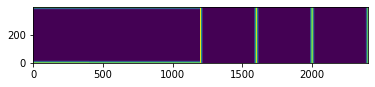

In [4]:
#Plot to check outer PML has been created
plt.rcParams["figure.figsize"] = 15, 6
fig, ax = plt.subplots(1,1)
Sigmas = np.column_stack((sxBx,sxBy,sxDz,syBx,syBy,syDz))
im = ax.imshow(Sigmas, interpolation='none', aspect=1, origin='lower')

In [5]:
#Creating PML for centre region
sigma = np.zeros((imax,jmax))
radius = 40    # Radius of inner PML - Set to Schwarzschild radius
for i in range(imax):   # Loop over all points
    for j in range(jmax):
        r = np.sqrt((imax/2-i)**2+(jmax/2-j)**2)  # Find distance of point from centre
        if r<=radius:  # Checks if point is within Schwarzschild radius
            sigma[i,j] = (1/4)*(1-(r/radius))**alpha    #sigma_i = 0.25*(L_i/Lmax)**alpha

In [6]:
# Adds inner PML to existing outer PML
sxBx += sigma
syBx += sigma
sxBy += sigma
syBy += sigma
sxDz += sigma
syDz += sigma

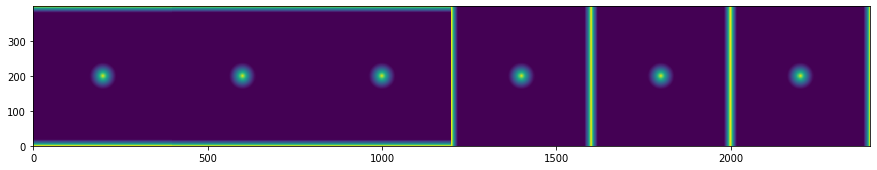

In [7]:
# Plot to check PML looks correct
plt.rcParams["figure.figsize"] = 15, 6
fig, ax = plt.subplots(1,1)
Sigmas = np.column_stack((sxBx,sxBy,sxDz,syBx,syBy,syDz))
im = ax.imshow(Sigmas, interpolation='none', aspect=1, origin='lower')

In [8]:
PML = np.concatenate((sxBx,sxBy,syBx,syBy,sxDz,syDz))  # Merge into 1 array
df = pd.DataFrame(PML)
df.to_csv('PML400_40.csv')  # Save as csv